<a href="https://colab.research.google.com/github/priyarameshd/KNN/blob/main/KNN_assignment_glass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [201]:
# KNN Classification
from pandas import read_csv
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
import seaborn as sns
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import warnings
warnings.filterwarnings("ignore")
from imblearn.over_sampling import RandomOverSampler

Prepare a model for glass classification using KNN

Data Description:

RI : refractive index

Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)

Mg: Magnesium

AI: Aluminum

Si: Silicon

K:Potassium

Ca: Calcium

Ba: Barium

Fe: Iron

Type: Type of glass: (class attribute)
1 -- building_windows_float_processed
 2 --building_windows_non_float_processed
 3 --vehicle_windows_float_processed
 4 --vehicle_windows_non_float_processed (none in this database)
 5 --containers
 6 --tableware
 7 --headlamps

In [202]:
glass_df = read_csv("glass.csv")

### EDA & Visualization

In [203]:
glass_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [204]:
glass_df.describe().T

,count,mean,std,min,25%,50%,75%,max
RI,214.0,1.518365,0.003037,1.51115,1.516522,1.51768,1.519157,1.53393
Na,214.0,13.407850,0.816604,10.73000,12.907500,13.30000,13.825000,17.38000
Mg,214.0,2.684533,1.442408,0.00000,2.115000,3.48000,3.600000,4.49000
Al,214.0,1.444907,0.499270,0.29000,1.190000,1.36000,1.630000,3.50000
Si,214.0,72.650935,0.774546,69.81000,72.280000,72.79000,73.087500,75.41000
K,214.0,0.497056,0.652192,0.00000,0.122500,0.55500,0.610000,6.21000
Ca,214.0,8.956963,1.423153,5.43000,8.240000,8.60000,9.172500,16.19000
Ba,214.0,0.175047,0.497219,0.00000,0.000000,0.00000,0.000000,3.15000
Fe,214.0,0.057009,0.097439,0.00000,0.000000,0.00000,0.100000,0.51000
Type,214.0,2.780374,2.103739,1.00000,1.000000,2.00000,3.000000,7.00000


In [205]:
glass_df['Type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [206]:
glass_df.duplicated().sum()

1

In [207]:
glass_df[glass_df.duplicated()]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1


In [208]:
glass_df = glass_df.drop_duplicates()

<Axes: >

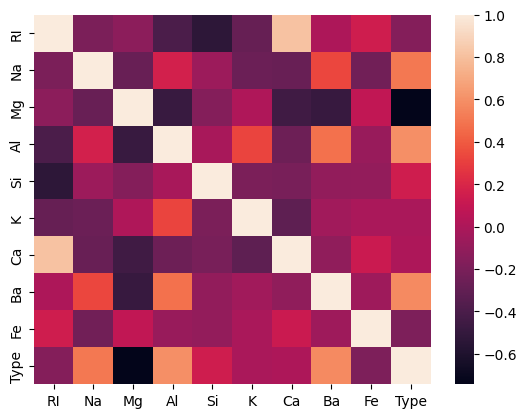

In [209]:
cor = glass_df.corr()
sns.heatmap(cor)

In [210]:
cor

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.198802,-0.127526,-0.400973,-0.539000,-0.287645,0.811183,0.001679,0.147083,-0.160140
Na,-0.198802,1.000000,-0.278420,0.167735,-0.064885,-0.264158,-0.278194,0.329080,-0.239374,0.508837
Mg,-0.127526,-0.278420,1.000000,-0.479575,-0.162437,0.007617,-0.446197,-0.491818,0.085426,-0.744195
Al,-0.400973,0.167735,-0.479575,1.000000,-0.016195,0.323683,-0.258068,0.480642,-0.080583,0.597432
Si,-0.539000,-0.064885,-0.162437,-0.016195,1.000000,-0.197281,-0.207145,-0.104389,-0.097717,0.147725
K,-0.287645,-0.264158,0.007617,0.323683,-0.197281,1.000000,-0.317032,-0.043653,-0.009372,-0.012455
Ca,0.811183,-0.278194,-0.446197,-0.258068,-0.207145,-0.317032,1.000000,-0.112208,0.126314,0.002677
Ba,0.001679,0.329080,-0.491818,0.480642,-0.104389,-0.043653,-0.112208,1.000000,-0.059729,0.574896
Fe,0.147083,-0.239374,0.085426,-0.080583,-0.097717,-0.009372,0.126314,-0.059729,1.000000,-0.191090
Type,-0.160140,0.508837,-0.744195,0.597432,0.147725,-0.012455,0.002677,0.574896,-0.191090,1.000000


RI,MG,K and Fe are having negative correlation with Type. CA and RI sttrongly correlated to each other, remove CA to avoid muticolinearity.

In [211]:
glass_df.drop(columns="Ca",inplace=True)

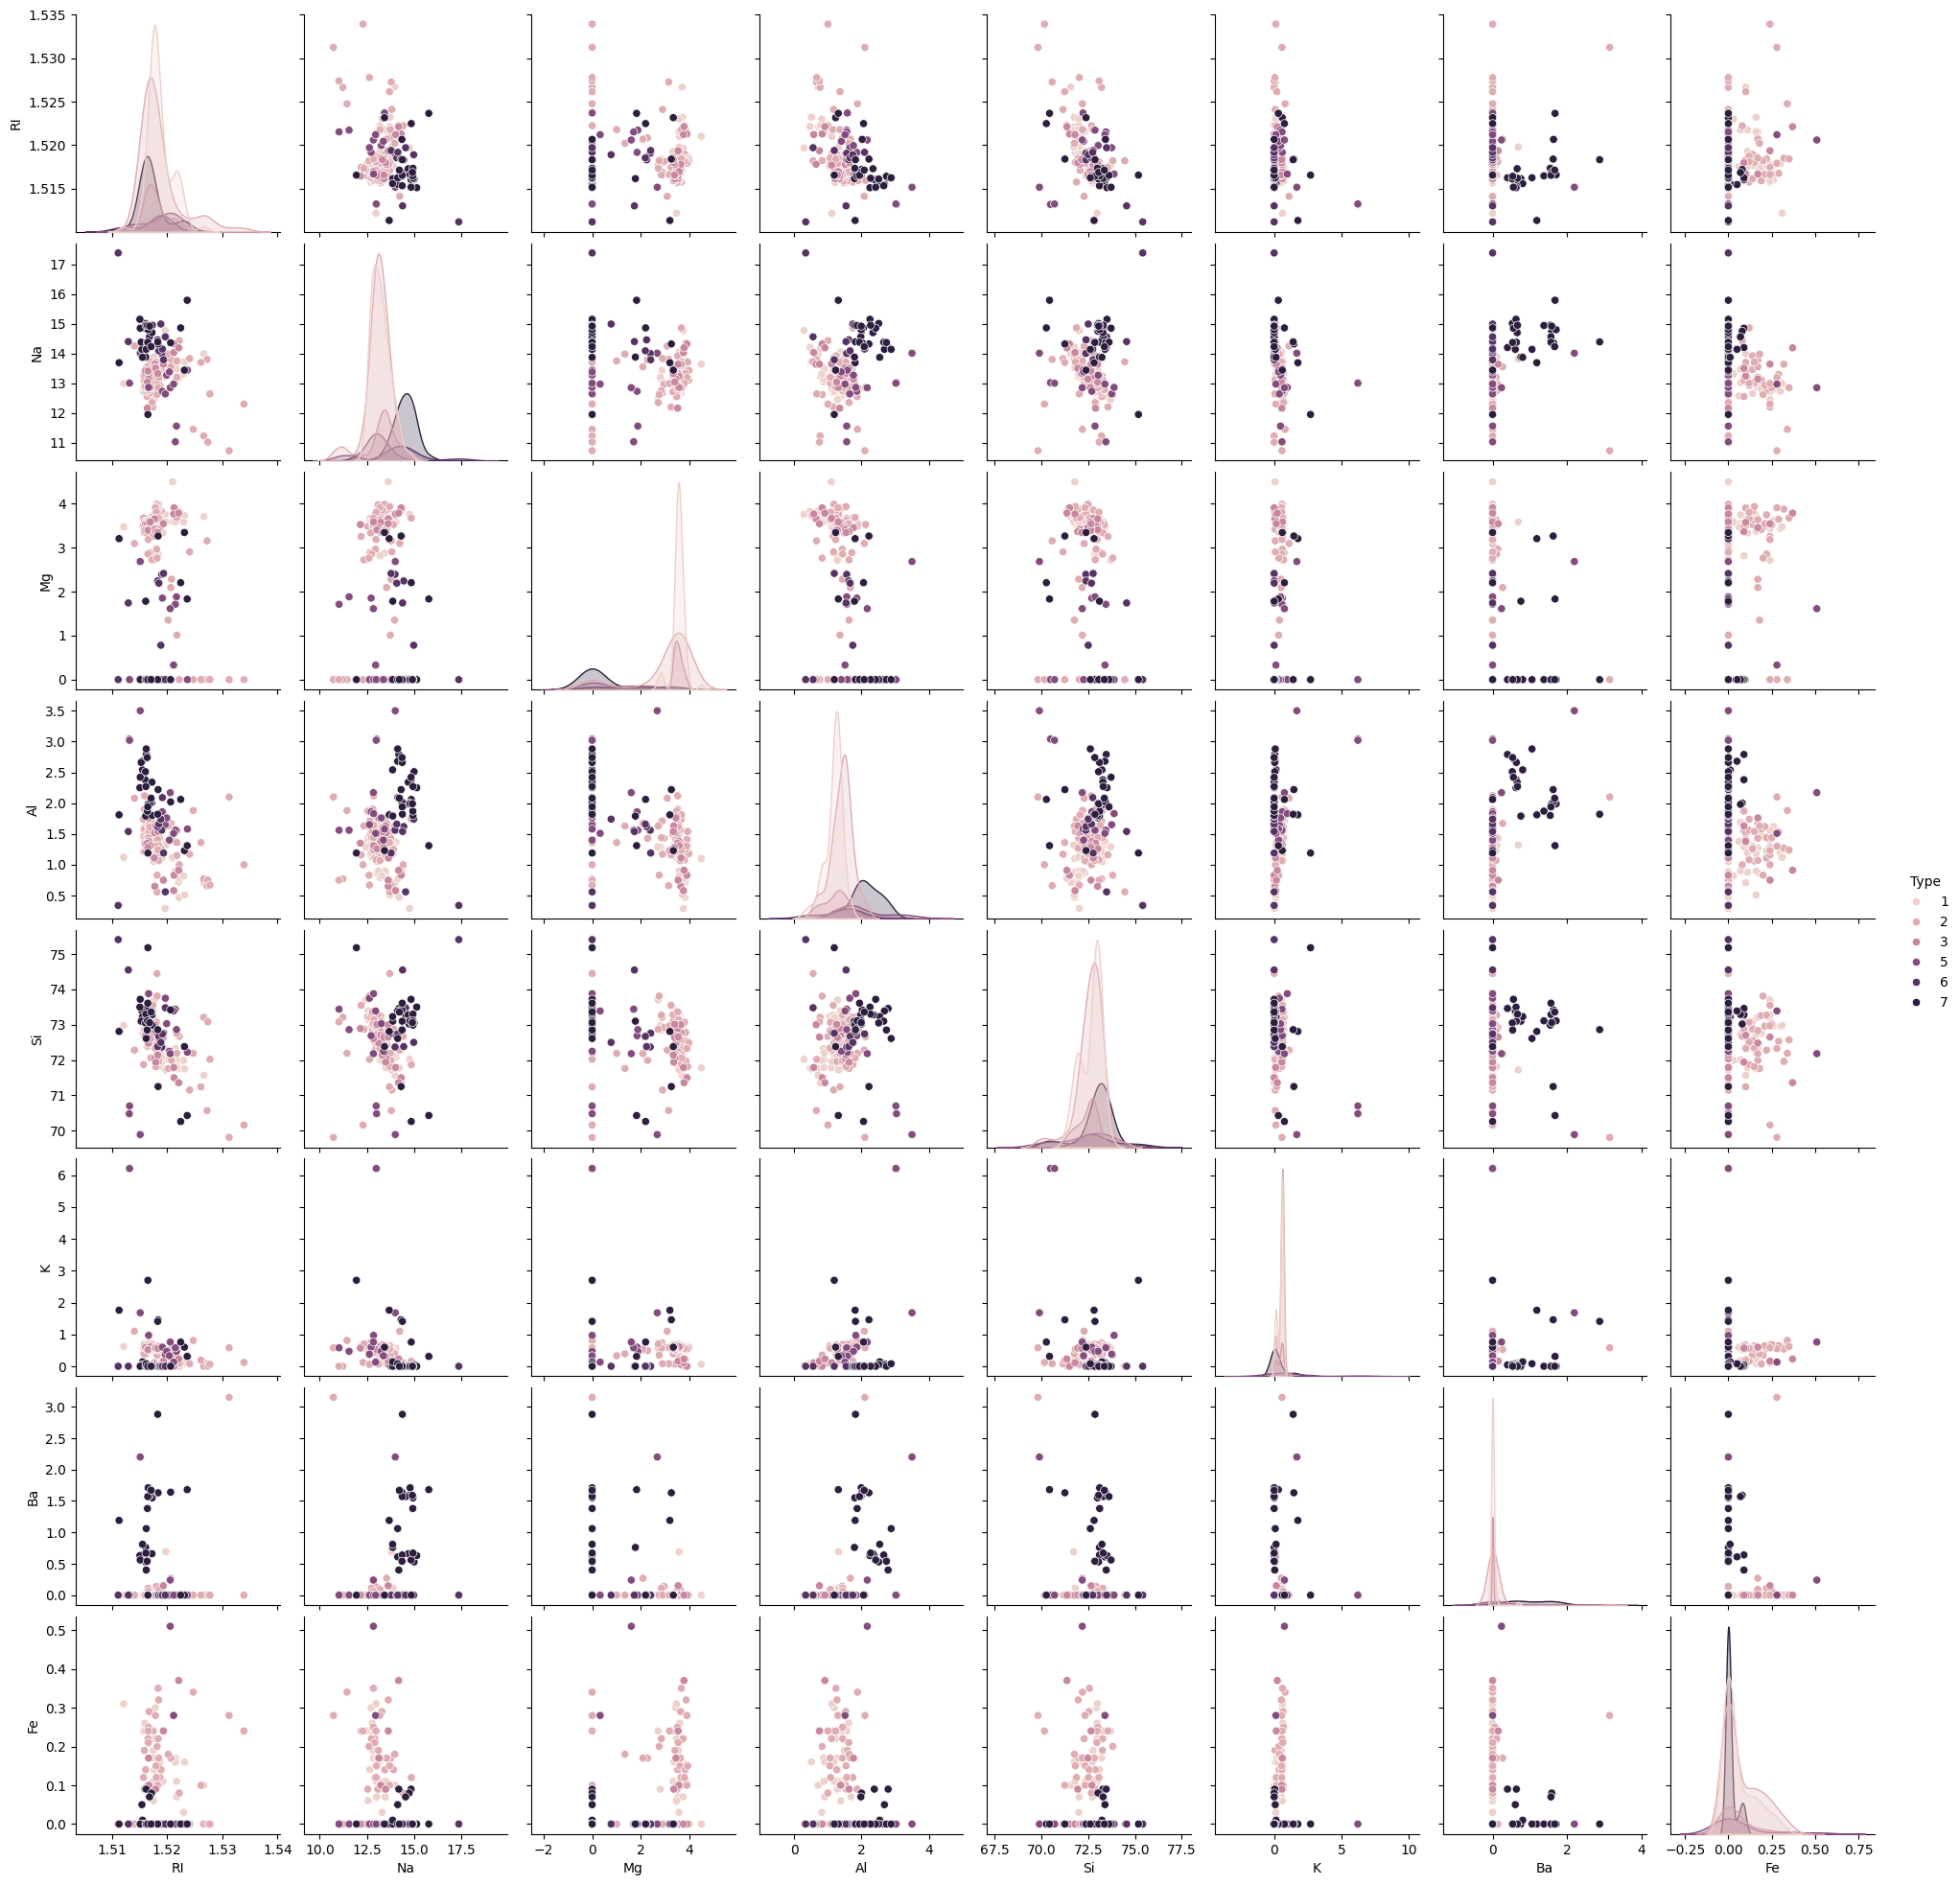

In [212]:
#pairwise plot of all the features
sns.pairplot(glass_df,hue='Type')
plt.show()

There is no linear relationship between data,so apply KNN.

In [213]:
ar_glass_df = glass_df.iloc[:,0:-1]

In [214]:
ar_glass_df.head(2)

,RI,Na,Mg,Al,Si,K,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,0.0,0.0


In [215]:
glass_ar = ar_glass_df.values

In [216]:
from sklearn.preprocessing import StandardScaler
# Normalization function
stscaler = StandardScaler().fit(glass_ar)
X = stscaler.transform(glass_ar)

In [217]:
glass_new = pd.DataFrame(X,columns=glass_df.columns[:-1])

In [218]:
glass_new.head(2)

,RI,Na,Mg,Al,Si,K,Ba,Fe
0,0.879840,0.289558,1.257238,-0.706370,-1.133248,-0.673480,-0.353808,-0.588301
1,-0.243816,0.596403,0.639311,-0.180863,0.097037,-0.028962,-0.353808,-0.588301


In [219]:
Y = glass_df['Type']

In [220]:
x_train,x_test,y_train,y_test= train_test_split(X,Y, test_size=0.3,random_state=45)

In [221]:
num_folds = 10
kfold = KFold(n_splits=10)

In [222]:
model = KNeighborsClassifier(n_neighbors=3).fit(x_train,y_train)
results = cross_val_score(model, x_train, y_train, cv=kfold)
results.mean()

0.6571428571428573


### Grid Search for Algorithm Tuning

In [223]:
# Grid Search for Algorithm Tuning
import numpy
from pandas import read_csv
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [224]:
n_neighbors = numpy.array(range(1,15))
param_grid = dict(n_neighbors=n_neighbors)

In [225]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X, Y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [226]:
print(grid.best_score_)
print(grid.best_params_)

0.6623477297895903
{'n_neighbors': 4}


### Visualizing the CV results

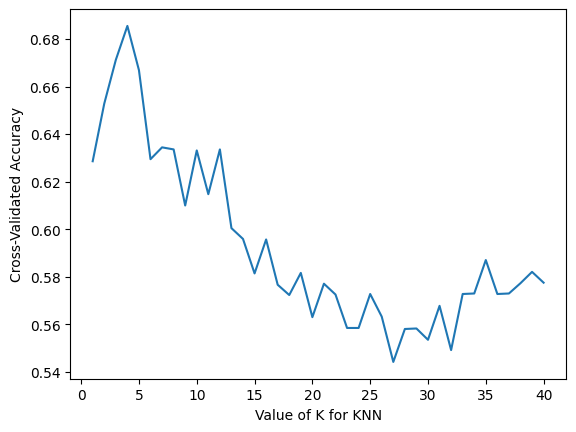

In [227]:
import matplotlib.pyplot as plt
%matplotlib inline
# choose k between 1 to 41
k_range = range(1, 41)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, Y, cv=10)
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

It's visible that acuracy is better when k value is 3 and 4.

In [228]:
model = KNeighborsClassifier(n_neighbors =4).fit(x_train,y_train)
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)
print(accuracy)

0.6875


In [229]:
confusion_matrix = confusion_matrix(y_test,y_pred)

<Axes: >

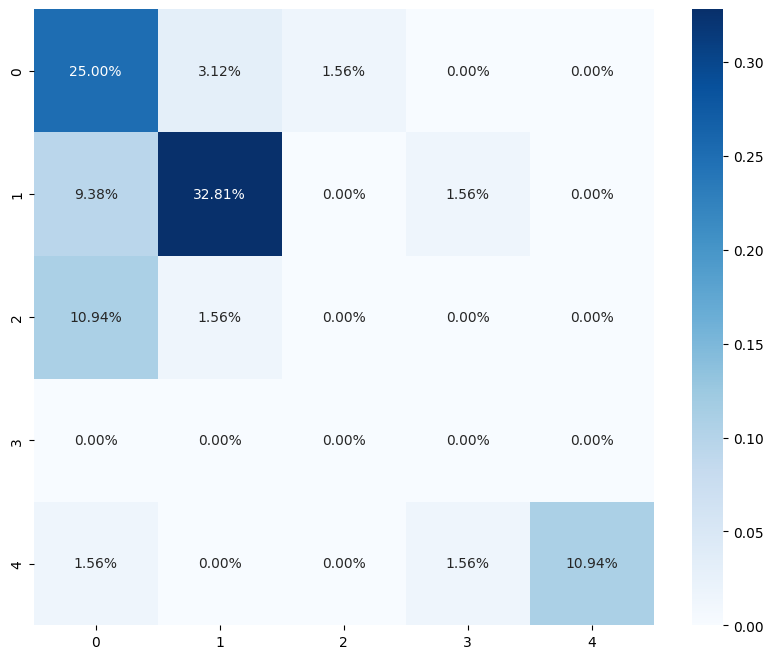

In [230]:
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix/np.sum(confusion_matrix), annot=True,
            fmt='.2%', cmap='Blues')

In [231]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.53      0.84      0.65        19
           2       0.88      0.75      0.81        28
           3       0.00      0.00      0.00         8
           5       0.00      0.00      0.00         0
           7       1.00      0.78      0.88         9

    accuracy                           0.69        64
   macro avg       0.48      0.47      0.47        64
weighted avg       0.68      0.69      0.67        64



### Over Sampling for balancing the data

In [232]:
ros = RandomOverSampler(random_state = 30)

In [233]:
x_resample, y_resample = ros.fit_resample(X, Y)
y_df = pd.DataFrame(y_resample)

In [234]:
y_df.value_counts()

Type
1       76
2       76
3       76
5       76
6       76
7       76
dtype: int64

In [235]:
x_train, x_test, y_train, y_test = train_test_split(x_resample, y_resample, test_size = .2, random_state = 30, stratify = y_resample)

In [236]:
n_neighbors = np.array(range(1,40))
param_grid = dict(n_neighbors=n_neighbors)

model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid,cv=10)
grid.fit(x_train, y_train)
print(grid.best_params_)

{'n_neighbors': 1}


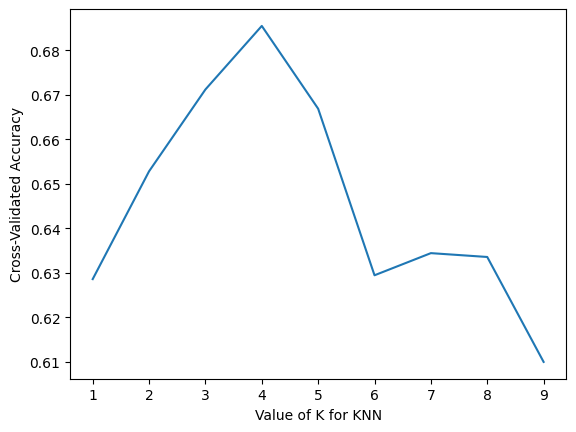

In [237]:
import matplotlib.pyplot as plt
%matplotlib inline
# choose k between 1 to 10
k_range = range(1, 10)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, Y, cv=10)
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

### KNN=1 classification

In [238]:
model = KNeighborsClassifier(n_neighbors = 1).fit(x_train,y_train)
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)
print(accuracy)

0.8804347826086957


In [240]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.69      0.73      0.71        15
           2       0.89      0.53      0.67        15
           3       0.83      1.00      0.91        15
           5       0.94      1.00      0.97        15
           6       0.94      1.00      0.97        16
           7       1.00      1.00      1.00        16

    accuracy                           0.88        92
   macro avg       0.88      0.88      0.87        92
weighted avg       0.88      0.88      0.87        92



In [241]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

In [243]:
print(confusion_matrix.shape)

(6, 6)


In [244]:
print(len(cm_display.display_labels))

2


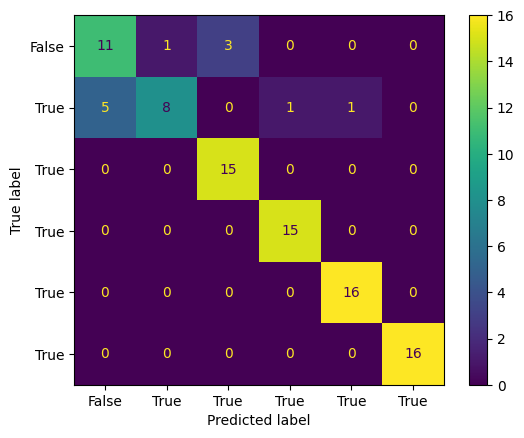

In [245]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True,True,True,True,True])

cm_display.plot()
plt.show()